In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list. <-- this list stores the random lattitude 
#and longitudes, so that it doesn't need to be generated multiple times. 
coordinates = list(lat_lngs)

In [4]:
# import citypy to see what cities fall near the longitude, latitude cooredinate. 
# Use the citipy module to determine city based on latitude and logitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and logitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count. 
len(cities)

634

### Import Requests Library and weather_api_key

In [6]:
# Import requests
import requests

# Import the API key. 
from config import weather_api_key

### Build the basic URL for the OpenWeatherMap with the weather_api_key

In [7]:
# Starting URL from the WeatherMap API Call. 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

### Build emply cell to hold data and construct the data retrieval

In [9]:
# Creat an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


### Loop through the List of Cities and Build the City URL

In [10]:
# # Loop through all the cities in our list. 
# for i in range(len(cities)):
    
#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city. 
#     city_url = url +"&q=" + cities[i]

### COMMENTED THIS OUT SINCE THIS WILL GIVE ERRORS WHEN BUILDING CITY_URL. IT ADDS THE INDEX
### NOT THE CITY NAME TO THE CITY_URL. TRY THE INSTEAD THE CELL BELOW.

In [11]:
# Loop through all the cities in the list. 
for i, city in enumerate(cities):
    
    #Group cities in set of 50 for logging purposes.
    if (i %  50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record{record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities:
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data. 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:S')
        
        # Append the city information into city_data list. 
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping ...")
        pass
    
# Indicate that the Data Loading is complete.
print("---------------------------------")
print("Data Retrieval Complete          ")
print("---------------------------------")

Processing Record1 of Set 1 | ushuaia
Processing Record2 of Set 1 | chuy
Processing Record3 of Set 1 | eidsvag
Processing Record4 of Set 1 | sao cristovao
Processing Record5 of Set 1 | westport
Processing Record6 of Set 1 | torbay
Processing Record7 of Set 1 | severodvinsk
Processing Record8 of Set 1 | padang
Processing Record9 of Set 1 | gizo
Processing Record10 of Set 1 | katangli
Processing Record11 of Set 1 | busselton
Processing Record12 of Set 1 | lisala
Processing Record13 of Set 1 | vaini
Processing Record14 of Set 1 | punta arenas
Processing Record15 of Set 1 | kahului
Processing Record16 of Set 1 | mataura
Processing Record17 of Set 1 | hilo
Processing Record18 of Set 1 | tiksi
Processing Record19 of Set 1 | castro
Processing Record20 of Set 1 | geraldton
Processing Record21 of Set 1 | batavia
Processing Record22 of Set 1 | mys shmidta
City not found. Skipping ...
Processing Record23 of Set 1 | jamestown
Processing Record24 of Set 1 | grand centre
City not found. Skipping ...

Processing Record48 of Set 4 | sotnikovo
Processing Record49 of Set 4 | tadine
Processing Record50 of Set 4 | sangmelima
Processing Record1 of Set 5 | safwah
City not found. Skipping ...
Processing Record2 of Set 5 | yuanping
Processing Record3 of Set 5 | kudahuvadhoo
Processing Record4 of Set 5 | butaritari
Processing Record5 of Set 5 | karkaralinsk
City not found. Skipping ...
Processing Record6 of Set 5 | kaitangata
Processing Record7 of Set 5 | atasu
Processing Record8 of Set 5 | puerto ayora
Processing Record9 of Set 5 | jiuquan
Processing Record10 of Set 5 | saldanha
Processing Record11 of Set 5 | zyryanka
Processing Record12 of Set 5 | moussoro
Processing Record13 of Set 5 | port hedland
Processing Record14 of Set 5 | paso de patria
Processing Record15 of Set 5 | nishihara
Processing Record16 of Set 5 | east london
Processing Record17 of Set 5 | guerrero negro
Processing Record18 of Set 5 | tonekabon
Processing Record19 of Set 5 | xixiang
Processing Record20 of Set 5 | mehamn
Pr

Processing Record43 of Set 8 | aksarka
Processing Record44 of Set 8 | cuyo
Processing Record45 of Set 8 | ambilobe
Processing Record46 of Set 8 | ornes
Processing Record47 of Set 8 | bathsheba
Processing Record48 of Set 8 | dalen
Processing Record49 of Set 8 | north branch
Processing Record50 of Set 8 | nevsehir
Processing Record1 of Set 9 | emerald
Processing Record2 of Set 9 | togur
Processing Record3 of Set 9 | lashio
Processing Record4 of Set 9 | manhattan
Processing Record5 of Set 9 | sol-iletsk
Processing Record6 of Set 9 | peto
Processing Record7 of Set 9 | byron bay
Processing Record8 of Set 9 | kavieng
Processing Record9 of Set 9 | chagda
City not found. Skipping ...
Processing Record10 of Set 9 | babanusah
City not found. Skipping ...
Processing Record11 of Set 9 | sao jose da coroa grande
Processing Record12 of Set 9 | mabaruma
Processing Record13 of Set 9 | moerai
Processing Record14 of Set 9 | shebunino
Processing Record15 of Set 9 | pervomayskiy
Processing Record16 of Set

Processing Record34 of Set 12 | litovko
Processing Record35 of Set 12 | seoul
Processing Record36 of Set 12 | dalvik
Processing Record37 of Set 12 | palu
Processing Record38 of Set 12 | luderitz
Processing Record39 of Set 12 | usinsk
Processing Record40 of Set 12 | iqaluit
Processing Record41 of Set 12 | port lincoln
Processing Record42 of Set 12 | dongsheng
Processing Record43 of Set 12 | meyungs
City not found. Skipping ...
Processing Record44 of Set 12 | norman wells
Processing Record45 of Set 12 | gobabis
Processing Record46 of Set 12 | brownwood
Processing Record47 of Set 12 | djibo
Processing Record48 of Set 12 | portland
Processing Record49 of Set 12 | cherskiy
Processing Record50 of Set 12 | gazanjyk
Processing Record1 of Set 13 | samoded
Processing Record2 of Set 13 | wanning
Processing Record3 of Set 13 | mao
Processing Record4 of Set 13 | kamaishi
Processing Record5 of Set 13 | boyolangu
Processing Record6 of Set 13 | jesup
Processing Record7 of Set 13 | dolbeau
City not fou

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,35.26,93,40,24.16,AR,2021-08-06 17:35:S
1,Chuy,-33.6971,-53.4616,65.61,73,85,8.16,UY,2021-08-06 17:38:S
2,Eidsvag,62.7767,8.0668,75.25,59,64,1.32,NO,2021-08-06 17:38:S
3,Sao Cristovao,-11.0147,-37.2064,82.31,65,40,17.27,BR,2021-08-06 17:38:S
4,Westport,41.1415,-73.3579,91.08,52,1,1.01,US,2021-08-06 17:38:S
5,Torbay,47.6666,-52.7314,81.37,77,40,25.32,CA,2021-08-06 17:38:S
6,Severodvinsk,64.5635,39.8302,60.91,75,11,6.20,RU,2021-08-06 17:38:S
7,Padang,-0.9492,100.3543,78.42,82,95,3.40,ID,2021-08-06 17:38:S
8,Gizo,-8.1030,156.8419,81.01,72,98,16.58,SB,2021-08-06 17:38:S
9,Katangli,51.7102,143.2326,53.76,99,100,13.82,RU,2021-08-06 17:38:S


### Reorder the columns to put the customer interest first. 

In [13]:
# Reorder the DataFrame
new_city_data_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]

In [14]:
new_city_data_df = city_data_df[new_city_data_order]
new_city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-08-06 17:35:S,-54.8000,-68.3000,35.26,93,40,24.16
1,Chuy,UY,2021-08-06 17:38:S,-33.6971,-53.4616,65.61,73,85,8.16
2,Eidsvag,NO,2021-08-06 17:38:S,62.7767,8.0668,75.25,59,64,1.32
3,Sao Cristovao,BR,2021-08-06 17:38:S,-11.0147,-37.2064,82.31,65,40,17.27
4,Westport,US,2021-08-06 17:38:S,41.1415,-73.3579,91.08,52,1,1.01
5,Torbay,CA,2021-08-06 17:38:S,47.6666,-52.7314,81.37,77,40,25.32
6,Severodvinsk,RU,2021-08-06 17:38:S,64.5635,39.8302,60.91,75,11,6.20
7,Padang,ID,2021-08-06 17:38:S,-0.9492,100.3543,78.42,82,95,3.40
8,Gizo,SB,2021-08-06 17:38:S,-8.1030,156.8419,81.01,72,98,16.58
9,Katangli,RU,2021-08-06 17:38:S,51.7102,143.2326,53.76,99,100,13.82


### Create a CSV File

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the new_city_data_df into a csv file
new_city_data_df.to_csv(output_data_file, index_label = "City_ID")

### Plot the Data at Current Time (need to import time module)

In [16]:
# Extract relevant fields from DataFrame for plotting.
lats = new_city_data_df["Lat"]
max_temps = new_city_data_df["Max Temp"]
humidity = new_city_data_df["Humidity"]
cloudiness = new_city_data_df["Cloudiness"]
wind_speed = new_city_data_df["Wind Speed"]

In [17]:
# Import the time module PRACTICE WITH TIME MODULE
#import time
#Get today's date in seconds.
# today = time.strftime("%x")
# today

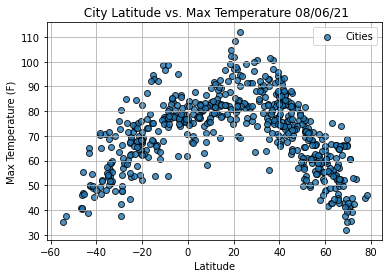

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f" City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")
plt.legend()

# Show plot
plt.show()

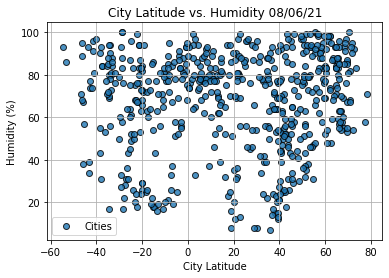

In [19]:
# Scatter plot of latitude vs. Humidity
plt.scatter(lats, humidity,
            edgecolor = "black", linewidths = 1, marker = "o", 
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel(f"City Latitude")
plt.ylabel(f"Humidity (%)")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()
          

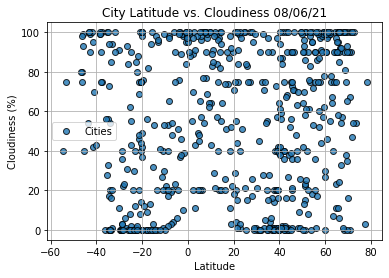

In [20]:
# Plot Latitude vs. Cloudiness
plt.scatter(lats, cloudiness,
            edgecolor = "black", linewidths = 1, marker = "o", 
            alpha = 0.8, label = "Cities")

plt.title("City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.legend()
#Save figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

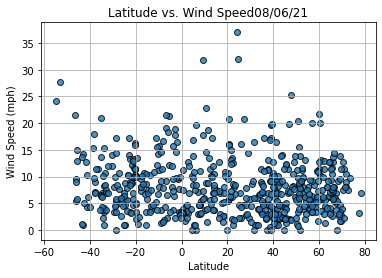

In [21]:
# Plot Latitude vs. Wind Speed.
plt.scatter(lats, wind_speed, 
           edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")
plt.title("Latitude vs. Wind Speed" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")
#Show plot
plt.show()

### Regression Analysis of four weather parameters as a function of latitude

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data.
# and plot a regression line and the equation with the data. 
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calcualte the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line. 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and lot the regression line. 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation. 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    

In [23]:
index13 = new_city_data_df.loc[13]

In [24]:
new_city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
577     True
578    False
579     True
580     True
581    False
Name: Lat, Length: 582, dtype: bool

### Create the Hemisphere DataFrame

In [25]:
# Create Nothern hemisphere DataFrame
northern_hemi_df = new_city_data_df.loc[(new_city_data_df["Lat"] >= 0)]
northern_hemi_df.tail()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
575,Sovetskiy,RU,2021-08-06 17:41:S,61.3614,63.5842,55.89,98,100,7.49
576,Fengzhen,CN,2021-08-06 17:41:S,40.4394,113.1536,65.77,44,87,2.15
577,Bowmore,US,2021-08-06 17:41:S,34.9421,-79.3031,82.56,78,90,3.00
579,Shasta Lake,US,2021-08-06 17:41:S,40.6804,-122.3708,86.09,39,1,3.06
580,Yumen,CN,2021-08-06 17:41:S,40.2833,97.2000,74.50,24,100,10.13


In [26]:
# Create Southern hemisphere DataFrame
southern_hemi_df = new_city_data_df.loc[(new_city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-08-06 17:35:S,-54.8000,-68.3000,35.26,93,40,24.16
1,Chuy,UY,2021-08-06 17:38:S,-33.6971,-53.4616,65.61,73,85,8.16
3,Sao Cristovao,BR,2021-08-06 17:38:S,-11.0147,-37.2064,82.31,65,40,17.27
7,Padang,ID,2021-08-06 17:38:S,-0.9492,100.3543,78.42,82,95,3.40
8,Gizo,SB,2021-08-06 17:38:S,-8.1030,156.8419,81.01,72,98,16.58


### Perform Linear Regression on the Max.Temp for the Northern Hemisphere

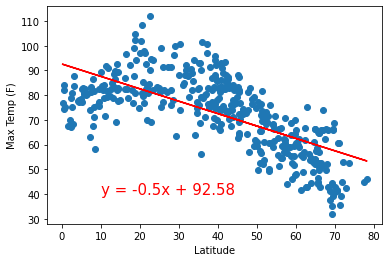

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp (F)', (10,40))


### Perform Linear Regression on the Max Temp for the Sothern Hemisphere

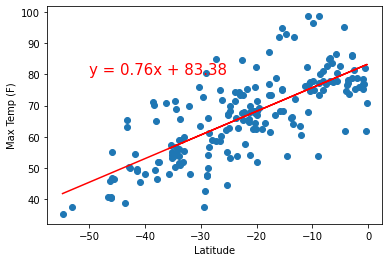

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the fuction. 
plot_linear_regression(x_values, y_values, 
                      'Linear Regresson on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp (F)', (-50, 80))

### Perform Linear Regression on the Percent Humidity for the N. & S. Hemisphere

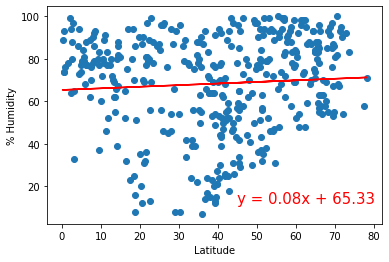

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function plot_linear_regression
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity', (45, 12))

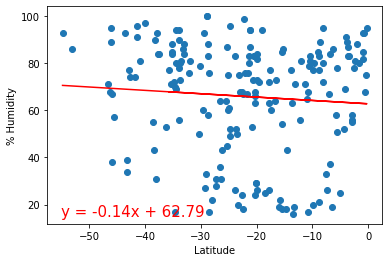

In [30]:
# Linear regression on the Percent Humidity for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function plot_linear_regression
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Southern Hemisphere \
                      for % Humidity', "% Humidity", (-55, 15))

### Perform Linear Regression on the Percent Cloudiness for the N. & S. Hemisphere

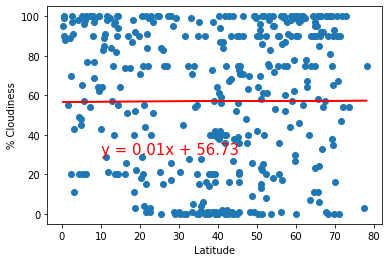

In [31]:
# Linear Regression on percent cloudiness for the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,"%Cloudiness vs Latitude \
                for Northern Hemisphere" ,"% Cloudiness", (10, 30))


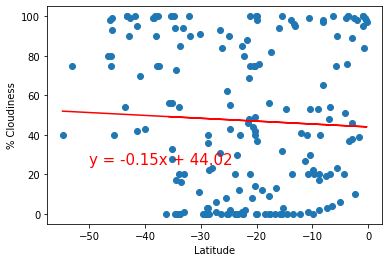

In [32]:
# Linear Regression on Pecent Cloudiness for the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function to plot
plot_linear_regression(x_values, y_values, 
                      '% Cloudiness vs. Latiture for Southern \
                      Hemisphere', "% Cloudiness", (-50, 25))

### # Find Correletation between Latitude and Wind Speed N. and S. Hemisphere

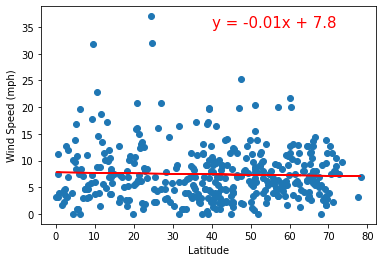

In [33]:
# Find Correletation between Latitude and Wind Speed Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the regression function to plot
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the \
                       Northern Hemisphere for Wind Speed", 'Wind Speed (mph)',(40,35))


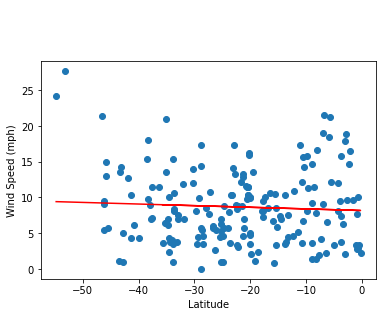

In [34]:
# Find the correclation between the latitude and the wind speed in S. Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the plot_regresson function
plot_linear_regression(x_values, y_values, 
                      "Correlation between Latitudes and Wind Speed \
                       for the Southern Hemisphere", "Wind Speed (mph)", (-30,35))